In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

In [2]:
data = pd.read_csv('data_with_clusters.csv', index_col=0)
data.head()

,pays,ados_non-scol,enfants_non-scol,inscriptions_ens_sup,inscriptions_primaire,inscriptions_préscol,inscriptions_secondaire,ratio_ens_sup,ratio_primaire,ratio_secondaire,...,indice_gini,pop_active_avec_diplome,tx_emploi_15+,tx_actifs_15-24,epargne_brute(PIB),cluster_km,cluster_km_2,cluster_km_5,cluster_ddg,cluster_db
0,Afghanistan,7.781353,3.996940,4.619342,94.895554,3.080470,39.700971,0.294833,0.599088,0.442298,...,65.500000,49.745001,49.372499,45.339999,20.896559,1,1,0,1,-1
1,Afrique du Sud,13.785806,7.176252,20.994972,104.268580,22.914647,94.457259,1.296527,0.963646,1.068906,...,63.550000,43.265556,38.091579,27.254737,16.371788,3,0,3,2,0
2,Albanie,4.755447,6.472873,41.650427,100.335247,66.300319,86.715374,1.308677,1.016700,0.982993,...,31.962500,45.808462,47.963571,34.666428,21.311708,3,0,2,2,0
3,Algérie,7.781353,2.718592,29.798487,111.345440,35.694609,80.699898,1.299649,0.938633,1.063733,...,27.600000,52.174000,34.886250,25.401429,47.290134,3,0,3,2,0
4,Allemagne,2.639915,2.280481,67.467917,102.896194,108.693307,101.335926,0.985777,0.995832,0.959991,...,30.878571,38.054737,55.450000,50.402631,26.247102,0,0,1,2,0


## Analyse des groupes obtenus par K-Means

### Avec K = 2

In [3]:
data.groupby(['cluster_km_2']).describe().T

cluster_km_2                  0          1
ados_non-scol count  142.000000  62.000000
              mean     6.644390  29.819591
              std      5.316677  19.226455
              min      0.061662   4.413385
              25%      2.099118  11.972812
...                         ...        ...
cluster_db    min     -1.000000  -1.000000
              25%      0.000000  -1.000000
              50%      0.000000   0.000000
              75%      0.000000   0.000000
              max      0.000000   1.000000

[208 rows x 2 columns]

In [4]:
cols = data.columns.to_list()
cols.pop(0)
cols.pop(-1)
cols.pop(-1)
cols.pop(-1)

'cluster_km_5'

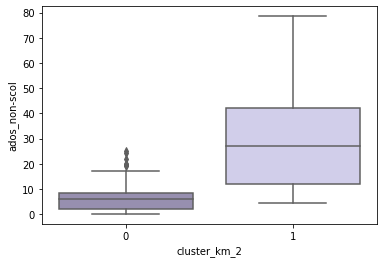

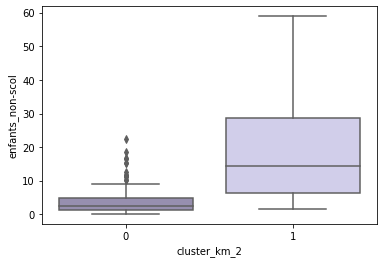

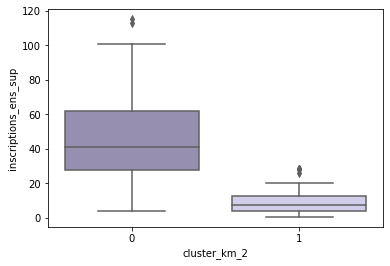

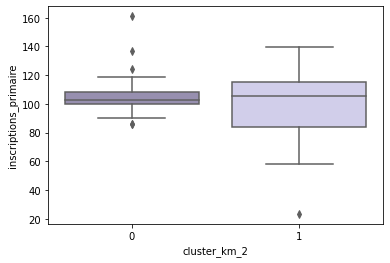

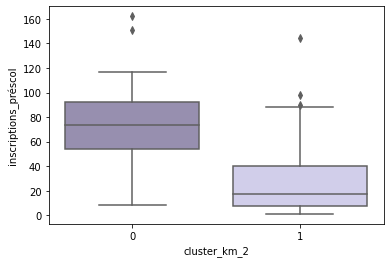

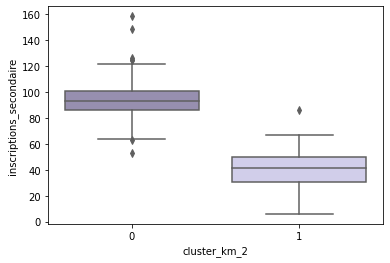

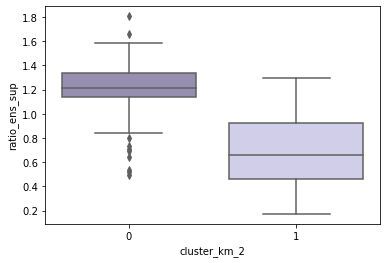

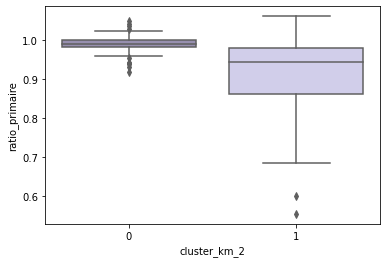

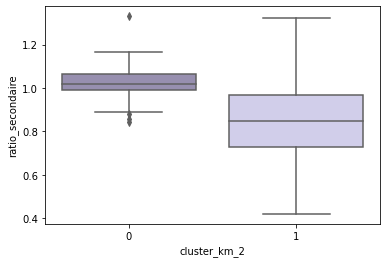

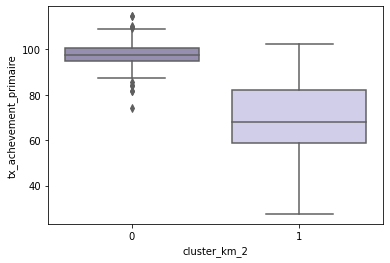

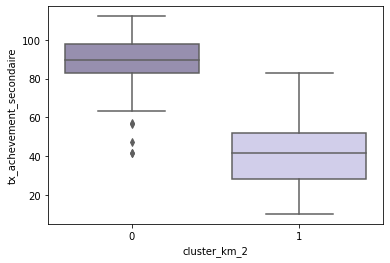

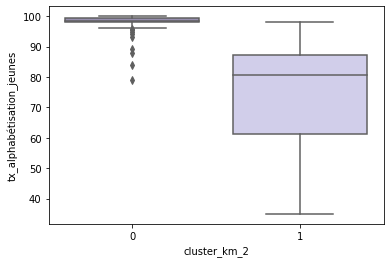

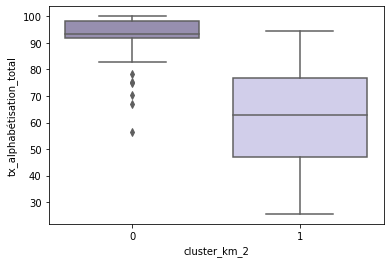

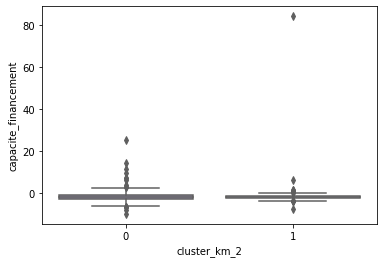

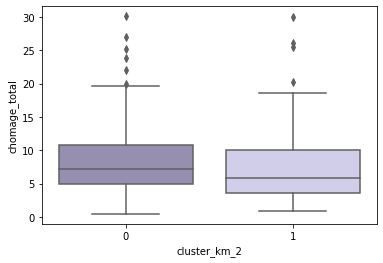

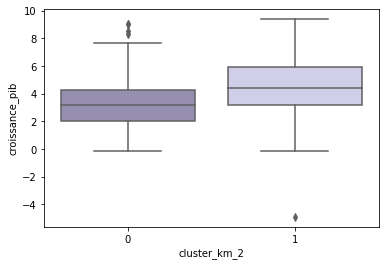

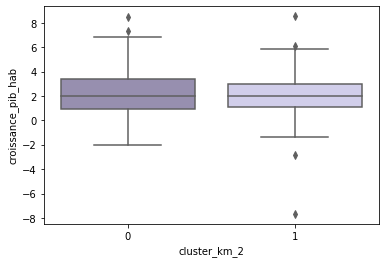

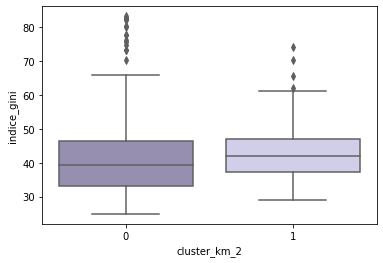

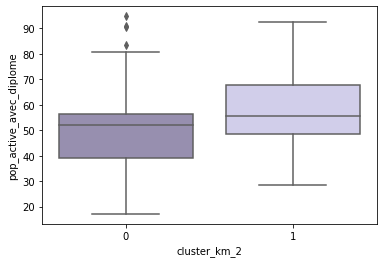

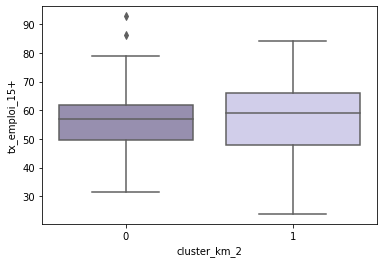

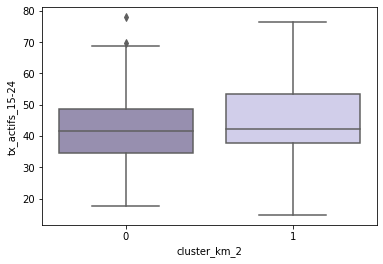

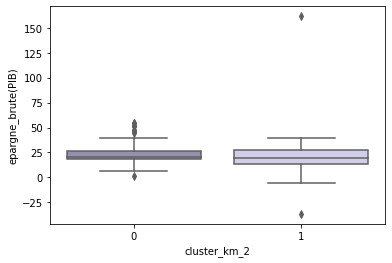

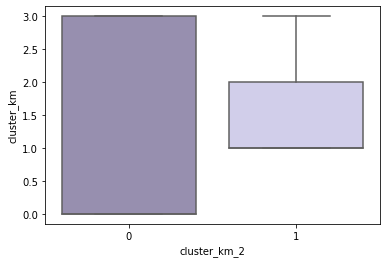

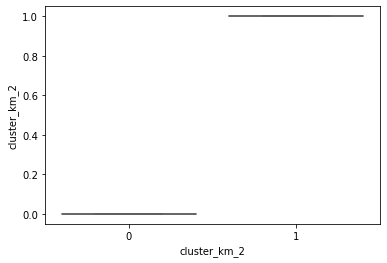

In [5]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#cdc9ef"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_km_2', y = i, data = data)
    plt.show()

In [6]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 1][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=108.88801135719496, pvalue=1.7171886673713799e-25)
Test de Student : Ttest_indResult(statistic=-14.402938583305328, pvalue=2.014312904724946e-27)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=134.87107054174678, pvalue=3.5232004155958074e-31)
Test de Student : Ttest_indResult(statistic=-11.388347843976694, pvalue=1.583576033727211e-20)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=64.324486320218, pvalue=1.0552607661140242e-15)
Test de Student : Ttest_indResult(statistic=11.917728888230792, pvalue=9.296349638776273e-22)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=82.50432308497034, pvalue=1.0543927139831517e-19)
Test de Student : Ttest_indResult(statistic=2.697955086560497, pvalue=0.008036599419954406)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=2.8849189683607834, pvalue=0.08941250460308668)
Test de Student : Ttest_indResult(statistic=24.51357748533691

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


### Avec K = 4

In [7]:
data.groupby(['cluster_km']).describe().T

cluster_km                   0          1          2          3
ados_non-scol count  76.000000  40.000000  21.000000  67.000000
              mean    4.559694  37.537437  17.397480   8.640846
              std     4.367553  19.102825   8.496733   4.810286
              min     0.061662   7.781353   4.413385   0.391789
              25%     1.388818  25.675903  10.813036   5.989805
...                        ...        ...        ...        ...
cluster_db    min    -1.000000  -1.000000  -1.000000  -1.000000
              25%     0.000000  -1.000000  -1.000000   0.000000
              50%     0.000000   0.000000   0.000000   0.000000
              75%     0.000000   0.000000   0.000000   0.000000
              max     0.000000   0.000000   1.000000   0.000000

[208 rows x 4 columns]

In [8]:
cols = data.columns.to_list()
cols.pop(0)
cols.pop(-1)
cols.pop(-1)
cols.pop(-1)

'cluster_km_5'

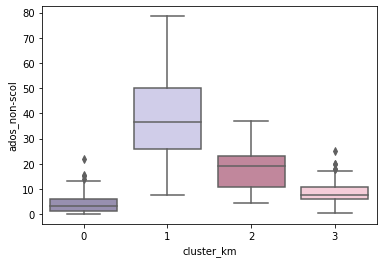

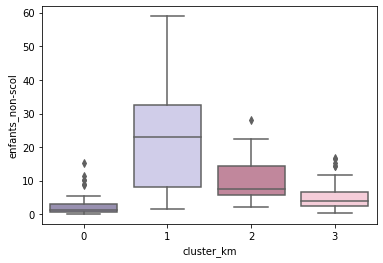

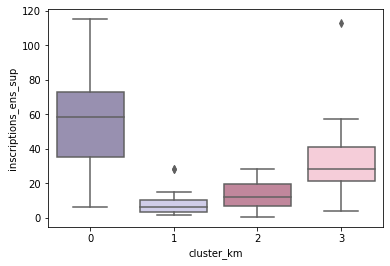

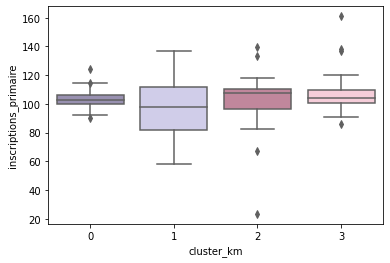

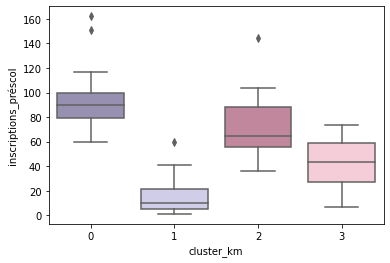

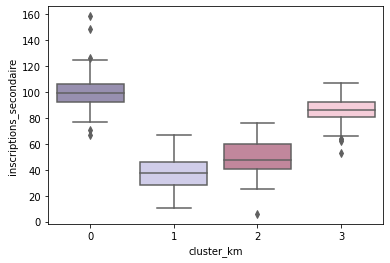

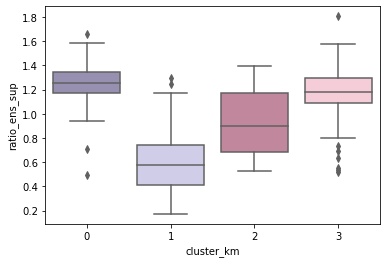

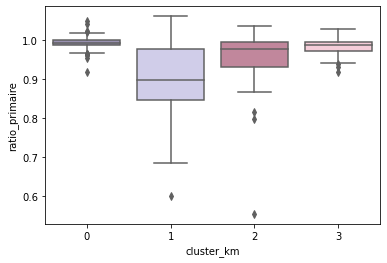

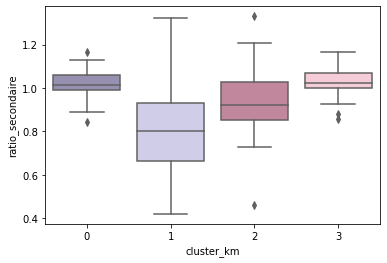

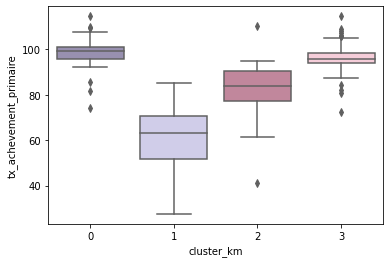

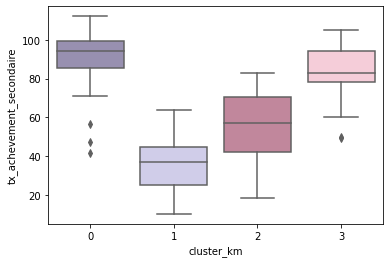

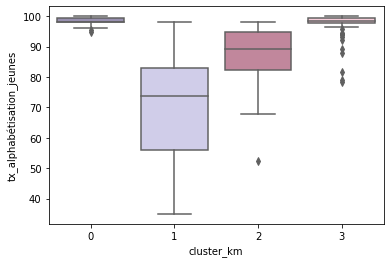

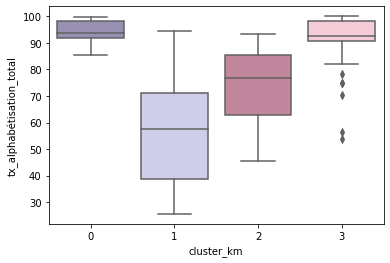

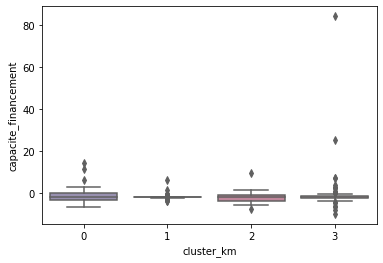

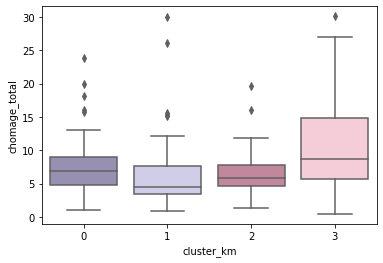

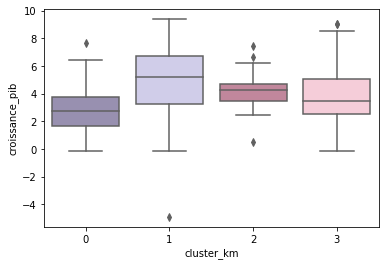

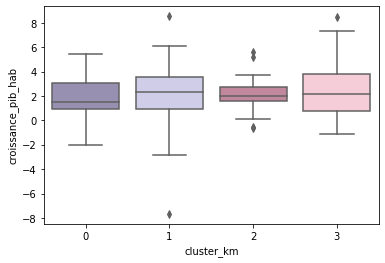

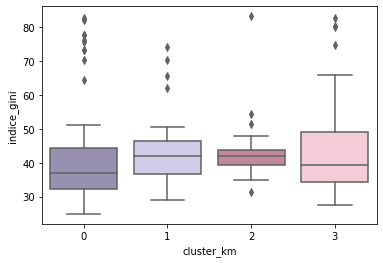

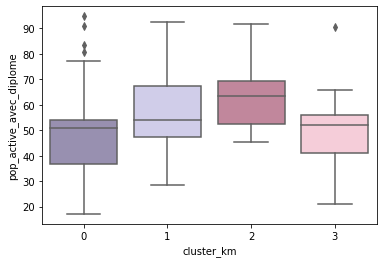

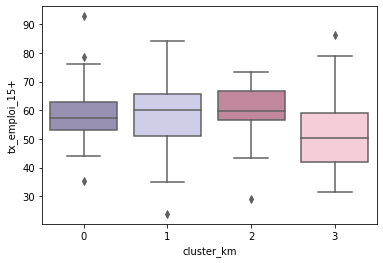

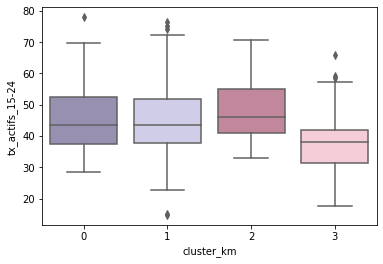

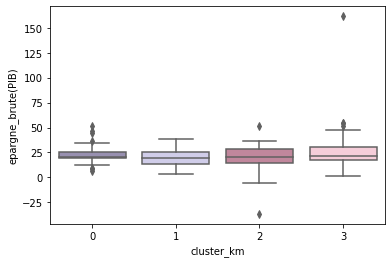

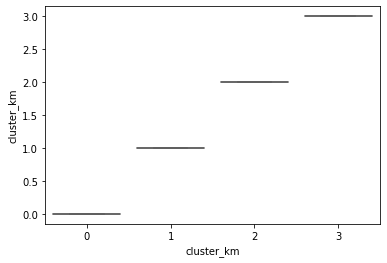

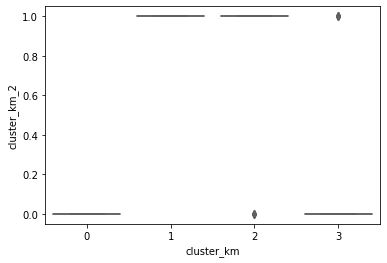

In [9]:
# Create an array with the colors you want to use
colors = ["#958bb5", "#ccc8ee","#cb7d9a", "#fbc7d6"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_km', y = i, data = data)
    plt.show()

In [10]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 1][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=108.88801135719496, pvalue=1.7171886673713799e-25)
Test de Student : Ttest_indResult(statistic=-14.402938583305328, pvalue=2.014312904724946e-27)
Test de Welsch : Ttest_indResult(statistic=-10.771093391172764, pvalue=1.5095271649914238e-13)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=134.87107054174678, pvalue=3.5232004155958074e-31)
Test de Student : Ttest_indResult(statistic=-11.388347843976694, pvalue=1.583576033727211e-20)
Test de Welsch : Ttest_indResult(statistic=-8.425468001665529, pvalue=1.9349611060046185e-10)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=64.324486320218, pvalue=1.0552607661140242e-15)
Test de Student : Ttest_indResult(statistic=11.917728888230792, pvalue=9.296349638776273e-22)
Test de Welsch : Ttest_indResult(statistic=15.829559453063043, pvalue=7.0438171311201575e-28)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=82.50432308497034, pvalue=1.05439

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [11]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=16.913266714815663, pvalue=3.91271619393615e-05)
Test de Student : Ttest_indResult(statistic=-9.466671609167289, pvalue=2.2809611307929686e-15)
Test de Welsch : Ttest_indResult(statistic=-6.684148383775718, pvalue=8.095946931948935e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=33.917187670351076, pvalue=5.7508411171014375e-09)
Test de Student : Ttest_indResult(statistic=-7.647766494474337, pvalue=1.6509481720743203e-11)
Test de Welsch : Ttest_indResult(statistic=-4.898053658777746, pvalue=6.929719146215959e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=21.017593534517143, pvalue=4.550851833710599e-06)
Test de Student : Ttest_indResult(statistic=7.459293428515474, pvalue=4.077843362139943e-11)
Test de Welsch : Ttest_indResult(statistic=11.928340984507802, pvalue=4.189166049642869e-20)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=89.97109492238327, pvalue=2.4166501894

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [12]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=0.6515948565287961, pvalue=0.4195430532479655)
Test de Student : Ttest_indResult(statistic=-5.317187645578715, pvalue=4.0341871183250403e-07)
Test de Welsch : Ttest_indResult(statistic=-5.284844749540457, pvalue=4.952609525907221e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=6.978754446816155, pvalue=0.008248299558029826)
Test de Student : Ttest_indResult(statistic=-4.732459983325353, pvalue=5.334555823635546e-06)
Test de Welsch : Ttest_indResult(statistic=-4.641329645695542, pvalue=8.962194841048435e-06)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=10.350883127730443, pvalue=0.0012941275760647367)
Test de Student : Ttest_indResult(statistic=6.740768510919626, pvalue=3.72758371495008e-10)
Test de Welsch : Ttest_indResult(statistic=6.902568730601242, pvalue=1.9202571292907147e-10)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=34.30208555856596, pvalue=4.718758267664039e-

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)



Test de Bartlett : BartlettResult(statistic=0.1470116306428587, pvalue=0.7014076666637885)
Test de Student : Ttest_indResult(statistic=16.495526899447878, pvalue=1.0081866420915357e-34)
Test de Welsch : Ttest_indResult(statistic=16.447655175817687, pvalue=3.144873335029764e-34)
Inscriptions_secondaire
Test de Bartlett : BartlettResult(statistic=5.210257120364311, pvalue=0.022454013801854838)
Test de Student : Ttest_indResult(statistic=7.514825944705748, pvalue=5.995520153361178e-12)
Test de Welsch : Ttest_indResult(statistic=7.6444561392375405, pvalue=3.2087016258546803e-12)
Ratio_ens_sup
Test de Bartlett : BartlettResult(statistic=3.9771695810307373, pvalue=0.04612100190021449)
Test de Student : Ttest_indResult(statistic=2.1820335142255667, pvalue=0.03076341145612572)
Test de Welsch : Ttest_indResult(statistic=2.1498583657061525, pvalue=0.03349207758882625)
Ratio_primaire
Test de Bartlett : BartlettResult(statistic=1.1159612638832204, pvalue=0.29078976329823625)
Test de Student : Tte

In [13]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=13.420352279578186, pvalue=0.0002489089513060404)
Test de Student : Ttest_indResult(statistic=4.585069703739919, pvalue=2.4105630112382164e-05)
Test de Welsch : Ttest_indResult(statistic=5.682641001048294, pvalue=4.5392904698481394e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=11.785256268805048, pvalue=0.0005970167311370094)
Test de Student : Ttest_indResult(statistic=3.587258282782764, pvalue=0.0006796587310935292)
Test de Welsch : Ttest_indResult(statistic=4.397318929370343, pvalue=4.689200214573183e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=4.085428551947983, pvalue=0.043254481130241544)
Test de Student : Ttest_indResult(statistic=-3.2562078982370486, pvalue=0.0018733126563907111)
Test de Welsch : Ttest_indResult(statistic=-2.8964993547836504, pvalue=0.006981106140700315)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=1.3571075013316596, pvalue=0.2440394065312

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [14]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=87.83387511924614, pvalue=7.118923240985256e-21)
Test de Student : Ttest_indResult(statistic=11.804645331723577, pvalue=5.63741056966446e-21)
Test de Welsch : Ttest_indResult(statistic=9.390971154929804, pvalue=7.121160295513483e-12)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=85.3762859448759, pvalue=2.466611018166616e-20)
Test de Student : Ttest_indResult(statistic=9.09135619204878, pvalue=6.678041874066575e-15)
Test de Welsch : Ttest_indResult(statistic=7.242418292869946, pvalue=6.459992949539747e-09)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=37.316168747364976, pvalue=1.0044834981742543e-09)
Test de Student : Ttest_indResult(statistic=-8.490886487664975, pvalue=1.4498503969298458e-13)
Test de Welsch : Ttest_indResult(statistic=-10.337647721738172, pvalue=4.9579950159897717e-17)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=14.931158766300284, pvalue=0.00011150604315

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [15]:
for i in cols:
    true = data.loc[data['cluster_km'] == 2][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=11.507478061639109, pvalue=0.0006931675884861374)
Test de Student : Ttest_indResult(statistic=5.957127990594531, pvalue=5.4702186905142864e-08)
Test de Welsch : Ttest_indResult(statistic=4.502028883705795, pvalue=0.00014550325391937433)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=13.10835691891818, pvalue=0.00029398141435432837)
Test de Student : Ttest_indResult(statistic=4.219745304501098, pvalue=6.036883140634528e-05)
Test de Welsch : Ttest_indResult(statistic=3.1414205444052192, pvalue=0.004445916013237942)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=9.126525442714893, pvalue=0.0025192973136606007)
Test de Student : Ttest_indResult(statistic=-4.457767448109962, pvalue=2.4851191009761698e-05)
Test de Welsch : Ttest_indResult(statistic=-6.013992702193593, pvalue=9.551503476553182e-08)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=21.602596348789653, pvalue=3.353975034625

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


### Avec K = 5

In [16]:
data.groupby(['cluster_km_5']).describe().T

cluster_km_5                 0          1          2          3          4
ados_non-scol count  40.000000  54.000000  56.000000  35.000000  19.000000
              mean   37.537437   3.299008   7.847304   9.717561  17.532131
              std    19.102825   3.265291   4.951017   5.267027   8.506617
              min     7.781353   0.061662   0.287375   1.662185   4.413385
              25%    25.675903   1.163535   4.722950   6.534002  11.223653
...                        ...        ...        ...        ...        ...
cluster_db    min    -1.000000  -1.000000  -1.000000  -1.000000  -1.000000
              25%    -1.000000   0.000000   0.000000   0.000000  -1.000000
              50%     0.000000   0.000000   0.000000   0.000000   0.000000
              75%     0.000000   0.000000   0.000000   0.000000   0.000000
              max     0.000000   0.000000   0.000000   0.000000   1.000000

[208 rows x 5 columns]

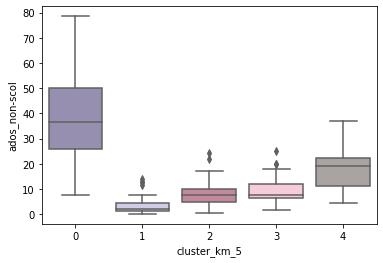

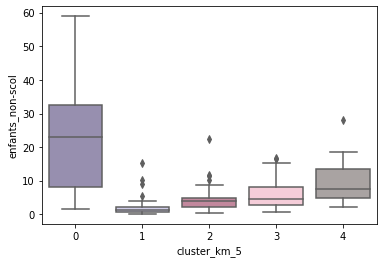

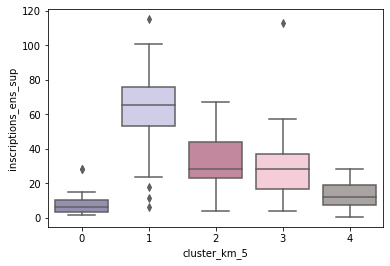

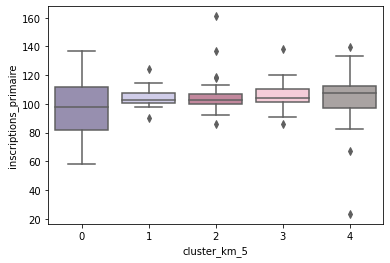

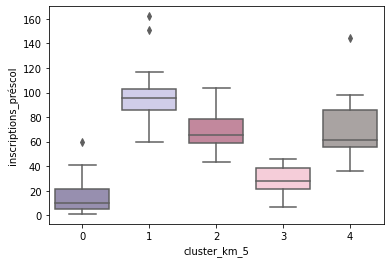

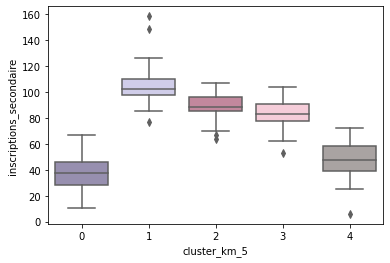

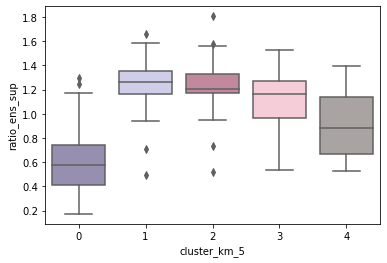

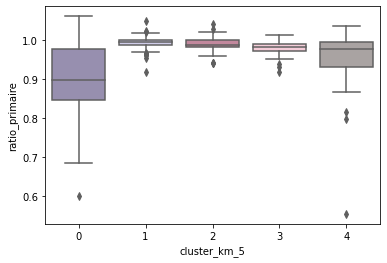

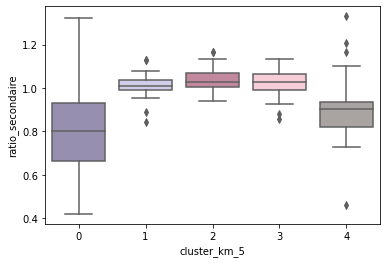

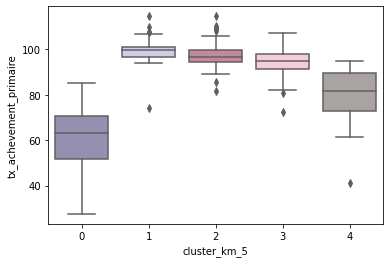

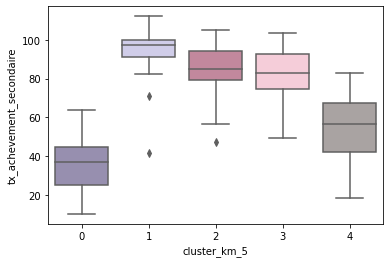

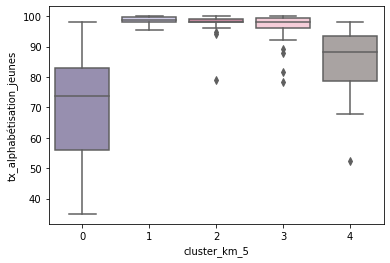

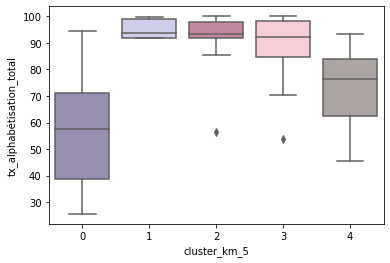

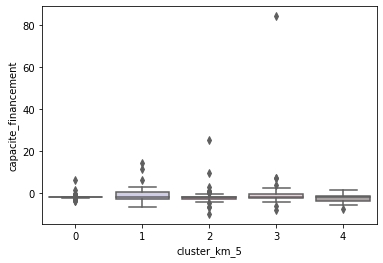

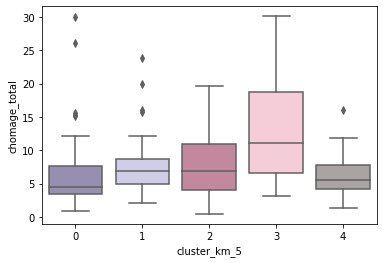

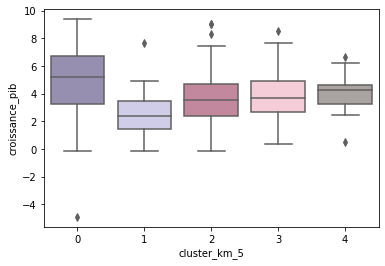

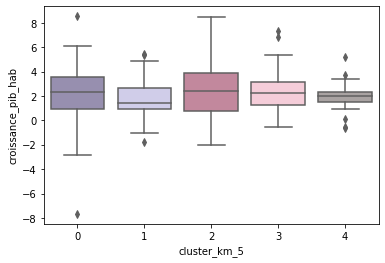

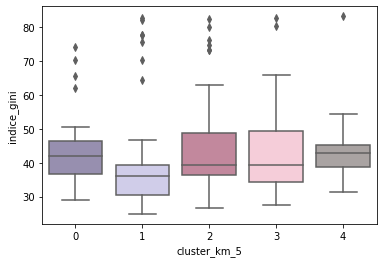

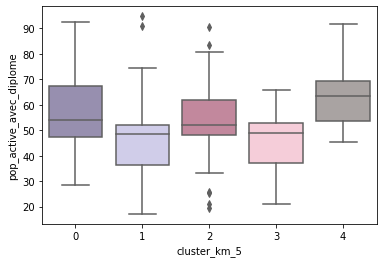

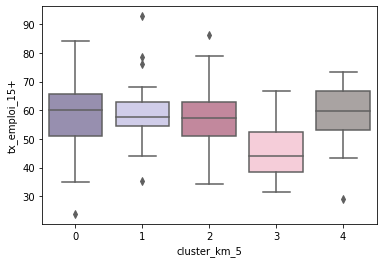

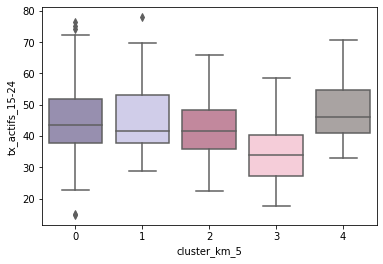

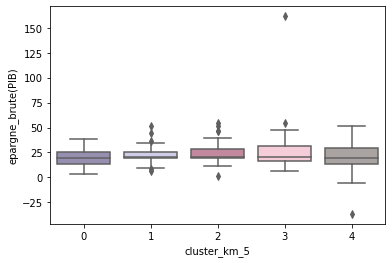

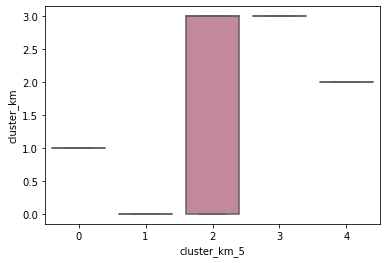

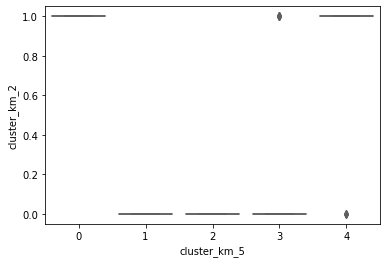

In [17]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#ccc8ee","#cc7e9b", "#fbc7d6", "#aaa2a1"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_km_5', y = i, data = data)
    plt.show()

In [18]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 1][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=110.63256087028682, pvalue=7.122011273016984e-26)
Test de Student : Ttest_indResult(statistic=12.941524605805824, pvalue=1.979967277974535e-22)
Test de Welsch : Ttest_indResult(statistic=11.214932700646996, pvalue=5.0586845829578405e-14)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=108.01550380054675, pvalue=2.6668389073135295e-25)
Test de Student : Ttest_indResult(statistic=9.912074291618742, pvalue=3.495624246329295e-16)
Test de Welsch : Ttest_indResult(statistic=8.593670271290955, pvalue=1.0750159707407051e-10)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=55.3564517398922, pvalue=1.0053933467787747e-13)
Test de Student : Ttest_indResult(statistic=-15.192617100997419, pvalue=8.169949367310338e-27)
Test de Welsch : Ttest_indResult(statistic=-17.31091368998646, pvalue=1.1463586735032654e-25)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=61.121474601969005, pvalue=5.36596343

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [19]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=73.5263254487032, pvalue=9.930286905962302e-18)
Test de Student : Ttest_indResult(statistic=11.139888915595687, pvalue=7.141081911968663e-19)
Test de Welsch : Ttest_indResult(statistic=9.602137320848293, pvalue=3.088137442295028e-12)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=81.12804645753383, pvalue=2.1155613716543868e-19)
Test de Student : Ttest_indResult(statistic=8.876231516670332, pvalue=4.502333583293135e-14)
Test de Welsch : Ttest_indResult(statistic=7.627443537348395, pvalue=1.811137818331709e-09)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=28.96049581768692, pvalue=7.386947432647453e-08)
Test de Student : Ttest_indResult(statistic=-10.269614547502623, pvalue=4.919620760641937e-17)
Test de Welsch : Ttest_indResult(statistic=-11.575503216878227, pvalue=1.2701200144446128e-18)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=15.452481198429924, pvalue=8.4605796645538

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [20]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=45.89745134936227, pvalue=1.2460796550606387e-11)
Test de Student : Ttest_indResult(statistic=8.33653296846283, pvalue=3.2817849318242948e-12)
Test de Welsch : Ttest_indResult(statistic=8.834794717061332, pvalue=1.908303291874258e-11)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=39.53263717352, pvalue=3.2262216344170737e-10)
Test de Student : Ttest_indResult(statistic=6.224125226702732, pvalue=2.755547678278757e-08)
Test de Welsch : Ttest_indResult(statistic=6.581764166207985, pvalue=3.435061536301441e-08)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=43.48942576505756, pvalue=4.2625651729312204e-11)
Test de Student : Ttest_indResult(statistic=-6.509192548677222, pvalue=8.351930945108068e-09)
Test de Welsch : Ttest_indResult(statistic=-6.153912740128079, pvalue=2.9966852409858365e-07)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=16.450104865728527, pvalue=4.994741903586376e

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [21]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=12.22508906774342, pvalue=0.0004715114282712841)
Test de Student : Ttest_indResult(statistic=4.349278627697732, pvalue=5.712139074301512e-05)
Test de Welsch : Ttest_indResult(statistic=5.563149255602381, pvalue=7.420104503888031e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=11.601224991401576, pvalue=0.0006590839218623594)
Test de Student : Ttest_indResult(statistic=3.570692807661953, pvalue=0.0007314989058334057)
Test de Welsch : Ttest_indResult(statistic=4.543595814371187, pvalue=2.924042181781542e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=2.847736240930589, pvalue=0.09150269653608649)
Test de Student : Ttest_indResult(statistic=-3.152170895806415, pvalue=0.002583742334297242)
Test de Welsch : Ttest_indResult(statistic=-2.80431516836028, pvalue=0.009207912107885616)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=1.762530163378361, pvalue=0.18430923846645197)
Tes

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [22]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 1][i]
    false = data.loc[data['cluster_km_5'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=8.966801974805339, pvalue=0.0027492940420992045)
Test de Student : Ttest_indResult(statistic=-5.665854683827805, pvalue=1.226518846876538e-07)
Test de Welsch : Ttest_indResult(statistic=-5.706940083984762, pvalue=1.2867827779837232e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=4.991530531198435, pvalue=0.02547166961842319)
Test de Student : Ttest_indResult(statistic=-3.586474790255387, pvalue=0.0005050099414974816)
Test de Welsch : Ttest_indResult(statistic=-3.6062078978203287, pvalue=0.0004848564552668878)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=9.32873120221041, pvalue=0.002255885004188079)
Test de Student : Ttest_indResult(statistic=8.349018796433906, pvalue=2.5262373628629786e-13)
Test de Welsch : Ttest_indResult(statistic=8.288085771757483, pvalue=9.699523924321128e-13)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=21.08402893769087, pvalue=4.3957661740964625e

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [23]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 1][i]
    false = data.loc[data['cluster_km_5'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=9.663429012120357, pvalue=0.001879724343353532)
Test de Student : Ttest_indResult(statistic=-7.1037534846555905, pvalue=3.1510200962387827e-10)
Test de Welsch : Ttest_indResult(statistic=-6.450682371410292, pvalue=4.00594400450917e-08)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=13.359457906061982, pvalue=0.000257122618409345)
Test de Student : Ttest_indResult(statistic=-5.427955995308348, pvalue=5.081039733438719e-07)
Test de Welsch : Ttest_indResult(statistic=-4.859054009703027, pvalue=1.2793565499584355e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=0.5881973574871856, pvalue=0.4431170371839753)
Test de Student : Ttest_indResult(statistic=7.2760322904800265, pvalue=1.4284077064089813e-10)
Test de Welsch : Ttest_indResult(statistic=7.46781791173573, pvalue=9.502293187455215e-11)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=11.35591696396362, pvalue=0.0007520798030457

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [24]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 1][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=29.0615926754904, pvalue=7.011328550910393e-08)
Test de Student : Ttest_indResult(statistic=-10.40393372878776, pvalue=6.354131265385752e-16)
Test de Welsch : Ttest_indResult(statistic=-7.111229339089773, pvalue=7.047121790801764e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=28.907579916670848, pvalue=7.591525388243251e-08)
Test de Student : Ttest_indResult(statistic=-6.981182942582858, pvalue=1.2713321984031434e-09)
Test de Welsch : Ttest_indResult(statistic=-4.774754738894308, pvalue=0.0001169521000652826)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=17.30260217178946, pvalue=3.187500578872635e-05)
Test de Student : Ttest_indResult(statistic=9.31685471931226, pvalue=6.114120182962113e-14)
Test de Welsch : Ttest_indResult(statistic=13.627840818459758, pvalue=1.921292144746702e-21)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=69.54692199637324, pvalue=7.461811146430842

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [25]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 2][i]
    false = data.loc[data['cluster_km_5'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=0.16040759669076876, pvalue=0.6887815294477355)
Test de Student : Ttest_indResult(statistic=-1.7106163573519766, pvalue=0.0906356763969944)
Test de Welsch : Ttest_indResult(statistic=-1.686119963478867, pvalue=0.09629459140944657)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=2.765979203944451, pvalue=0.09628775116434928)
Test de Student : Ttest_indResult(statistic=-2.3356310650377914, pvalue=0.021758337863608486)
Test de Welsch : Ttest_indResult(statistic=-2.203579690129779, pvalue=0.03145677544025076)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=3.9018964129386937, pvalue=0.048231635118532436)
Test de Student : Ttest_indResult(statistic=1.0487003554990635, pvalue=0.29715554556118384)
Test de Welsch : Ttest_indResult(statistic=0.9792982372881353, pvalue=0.33156369511362216)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=0.7143151516881081, pvalue=0.39801499739257584)
Test de

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [26]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 2][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=9.019065858331174, pvalue=0.0026717790302708596)
Test de Student : Ttest_indResult(statistic=-6.053572860343903, pvalue=5.5909845515653855e-08)
Test de Welsch : Ttest_indResult(statistic=-4.699889072156406, pvalue=0.00010600887772022372)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=13.105125613090525, pvalue=0.0002944889284607364)
Test de Student : Ttest_indResult(statistic=-4.5218295981555405, pvalue=2.3212401785884234e-05)
Test de Welsch : Ttest_indResult(statistic=-3.369976784174409, pvalue=0.002833609023698571)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=6.570543475583426, pvalue=0.010368028564879969)
Test de Student : Ttest_indResult(statistic=5.391566189168061, pvalue=8.216175935270121e-07)
Test de Welsch : Ttest_indResult(statistic=6.959259920775231, pvalue=4.464749276538971e-09)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=22.925624663500027, pvalue=1.683920106113

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [27]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 3][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=5.634841361934706, pvalue=0.017606938565046113)
Test de Student : Ttest_indResult(statistic=-4.172929412591832, pvalue=0.00011462028753493301)
Test de Welsch : Ttest_indResult(statistic=-3.64309848390256, pvalue=0.001193713700121008)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=3.7511069984086403, pvalue=0.052772550158599704)
Test de Student : Ttest_indResult(statistic=-2.2431556258949796, pvalue=0.029173530480316578)


D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


Test de Welsch : Ttest_indResult(statistic=-2.002555901578112, pvalue=0.055307619202246354)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=13.088408751280411, pvalue=0.00029712864555585857)
Test de Student : Ttest_indResult(statistic=3.2163429049895638, pvalue=0.0022349166464552817)
Test de Welsch : Ttest_indResult(statistic=3.9733792043751377, pvalue=0.00022777112467186898)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=23.130484548260288, pvalue=1.513717093247817e-06)
Test de Student : Ttest_indResult(statistic=0.7166719927817145, pvalue=0.4767831741898896)
Test de Welsch : Ttest_indResult(statistic=0.5681768520777252, pvalue=0.5759960663081669)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=16.796544533641658, pvalue=4.1609001146915016e-05)
Test de Student : Ttest_indResult(statistic=-8.257533249861464, pvalue=4.997998188800837e-11)
Test de Welsch : Ttest_indResult(statistic=-6.699978717792825, pvalue=1.0289774566918618e-06)
Ins

## Analyse des groupes obtenus par la CAH

In [28]:
data.groupby(['cluster_ddg']).describe().T

cluster_ddg                  1           2         3
ados_non-scol count  41.000000  162.000000   1.00000
              mean   35.049052    8.255439  17.92581
              std    20.601881    7.571287       NaN
              min     5.133520    0.061662  17.92581
              25%    14.357440    2.522141  17.92581
...                        ...         ...       ...
cluster_db    min    -1.000000   -1.000000  -1.00000
              25%    -1.000000    0.000000  -1.00000
              50%     0.000000    0.000000  -1.00000
              75%     0.000000    0.000000  -1.00000
              max     1.000000    0.000000  -1.00000

[208 rows x 3 columns]

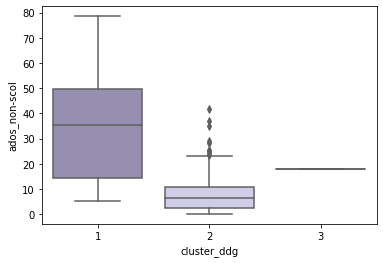

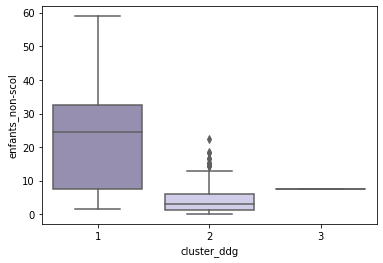

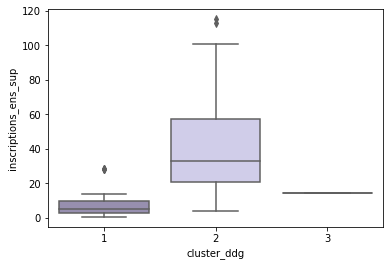

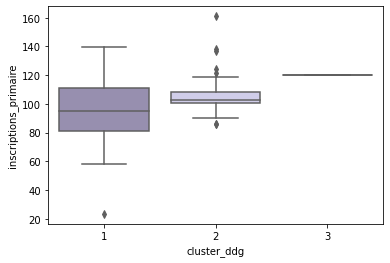

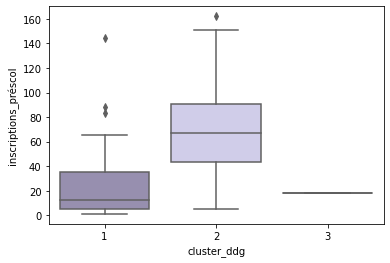

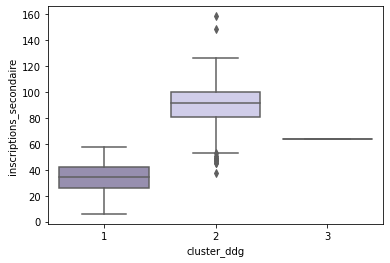

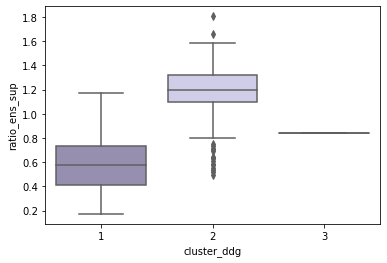

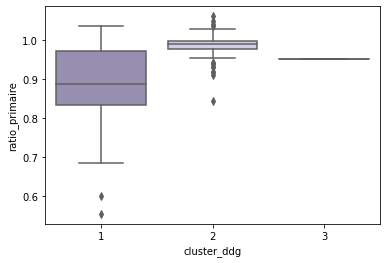

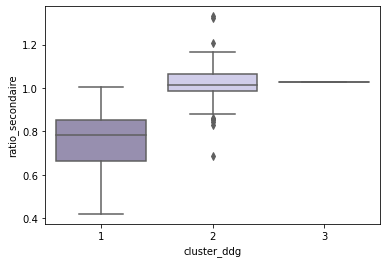

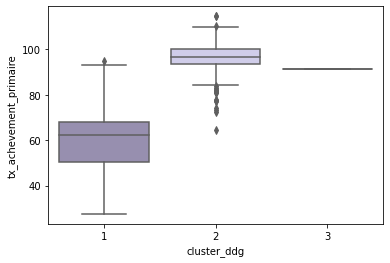

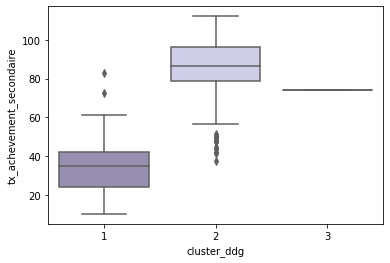

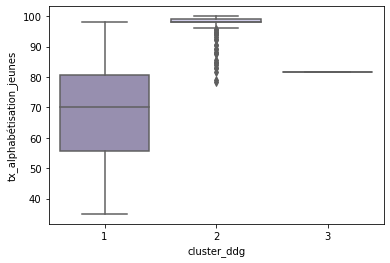

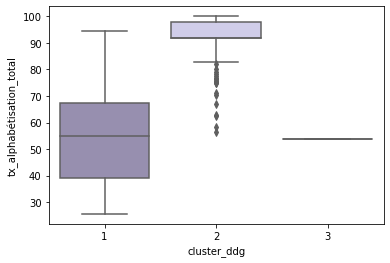

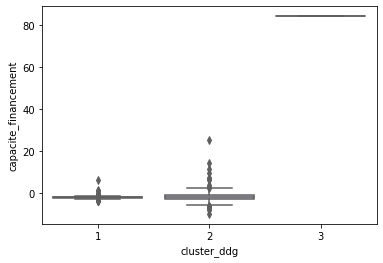

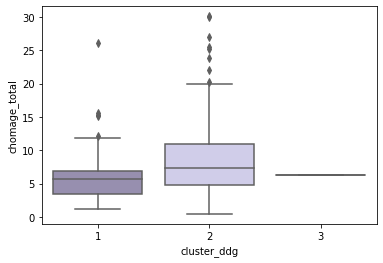

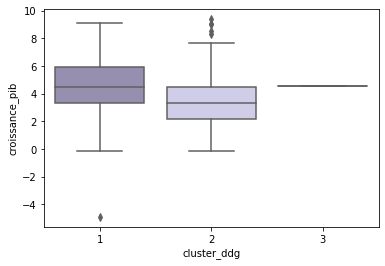

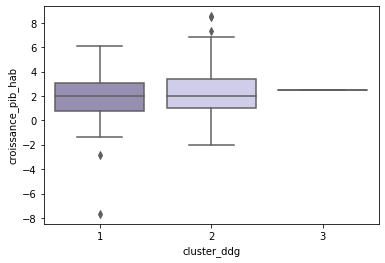

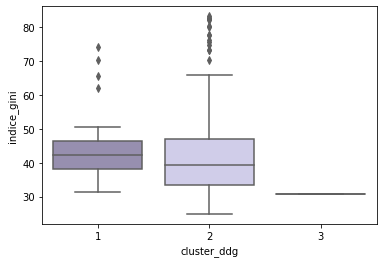

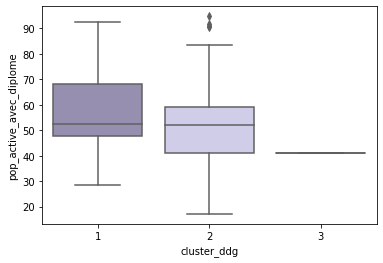

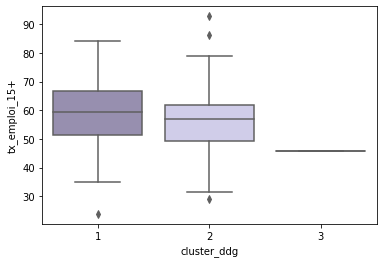

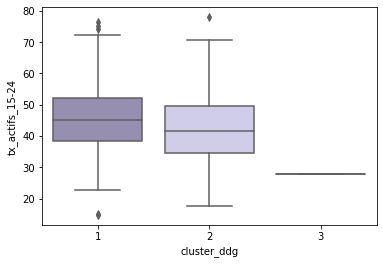

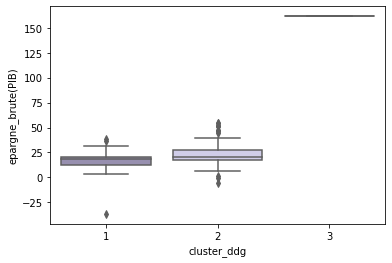

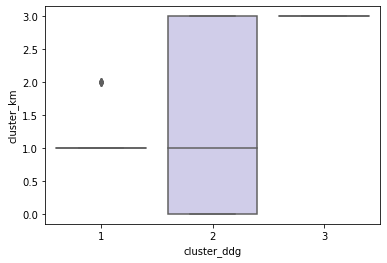

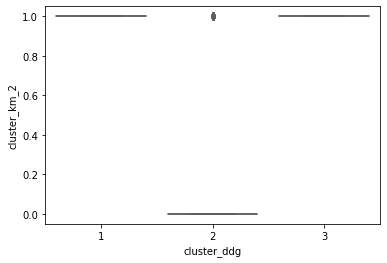

In [29]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#ccc8ee","#cc7e9b"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_ddg', y = i, data = data)
    plt.show()

In [30]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=13.420352279578186, pvalue=0.0002489089513060404)
Test de Student : Ttest_indResult(statistic=4.585069703739919, pvalue=2.4105630112382164e-05)
Test de Welsch : Ttest_indResult(statistic=5.682641001048294, pvalue=4.5392904698481394e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=11.785256268805048, pvalue=0.0005970167311370094)
Test de Student : Ttest_indResult(statistic=3.587258282782764, pvalue=0.0006796587310935292)
Test de Welsch : Ttest_indResult(statistic=4.397318929370343, pvalue=4.689200214573183e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=4.085428551947983, pvalue=0.043254481130241544)
Test de Student : Ttest_indResult(statistic=-3.2562078982370486, pvalue=0.0018733126563907111)
Test de Welsch : Ttest_indResult(statistic=-2.8964993547836504, pvalue=0.006981106140700315)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=1.3571075013316596, pvalue=0.2440394065312

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [31]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=87.83387511924614, pvalue=7.118923240985256e-21)
Test de Student : Ttest_indResult(statistic=11.804645331723577, pvalue=5.63741056966446e-21)
Test de Welsch : Ttest_indResult(statistic=9.390971154929804, pvalue=7.121160295513483e-12)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=85.3762859448759, pvalue=2.466611018166616e-20)
Test de Student : Ttest_indResult(statistic=9.09135619204878, pvalue=6.678041874066575e-15)
Test de Welsch : Ttest_indResult(statistic=7.242418292869946, pvalue=6.459992949539747e-09)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=37.316168747364976, pvalue=1.0044834981742543e-09)
Test de Student : Ttest_indResult(statistic=-8.490886487664975, pvalue=1.4498503969298458e-13)
Test de Welsch : Ttest_indResult(statistic=-10.337647721738172, pvalue=4.9579950159897717e-17)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=14.931158766300284, pvalue=0.00011150604315

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [32]:
for i in cols:
    true = data.loc[data['cluster_km'] == 2][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=11.507478061639109, pvalue=0.0006931675884861374)
Test de Student : Ttest_indResult(statistic=5.957127990594531, pvalue=5.4702186905142864e-08)
Test de Welsch : Ttest_indResult(statistic=4.502028883705795, pvalue=0.00014550325391937433)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=13.10835691891818, pvalue=0.00029398141435432837)
Test de Student : Ttest_indResult(statistic=4.219745304501098, pvalue=6.036883140634528e-05)
Test de Welsch : Ttest_indResult(statistic=3.1414205444052192, pvalue=0.004445916013237942)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=9.126525442714893, pvalue=0.0025192973136606007)
Test de Student : Ttest_indResult(statistic=-4.457767448109962, pvalue=2.4851191009761698e-05)
Test de Welsch : Ttest_indResult(statistic=-6.013992702193593, pvalue=9.551503476553182e-08)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=21.602596348789653, pvalue=3.353975034625

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


## Analyse des groupes obtenus par DBSCAN

In [33]:
data.groupby(['cluster_db']).describe().T

cluster_db,-1,0,1
ados_non-scol,20.161011,12.454828,11.069396
enfants_non-scol,14.525297,6.943232,5.663885
inscriptions_ens_sup,28.051903,34.773573,17.640799
inscriptions_primaire,105.230140,103.040868,74.848260
inscriptions_préscol,59.455311,57.962971,65.056644
inscriptions_secondaire,59.769985,81.874235,38.751175
ratio_ens_sup,0.927848,1.092864,1.027525
ratio_primaire,0.932134,0.973567,0.841379
ratio_secondaire,0.890669,0.985955,0.763476
tx_achevement_primaire,78.176703,91.149898,62.319996


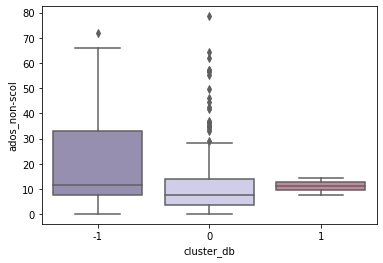

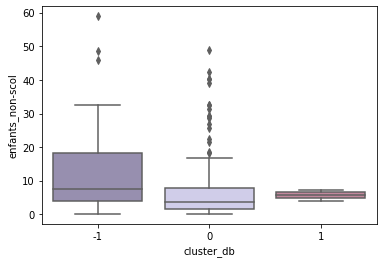

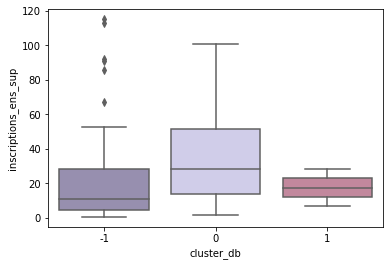

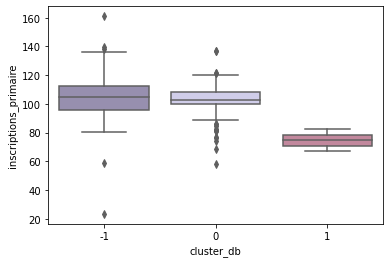

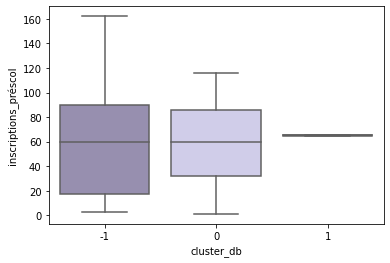

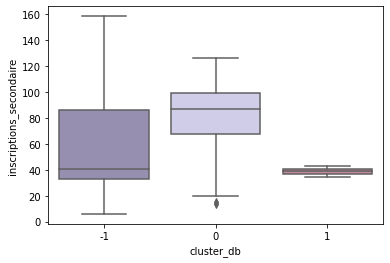

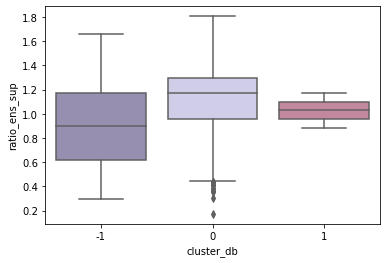

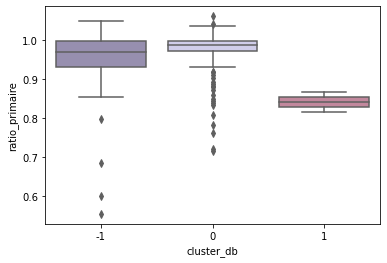

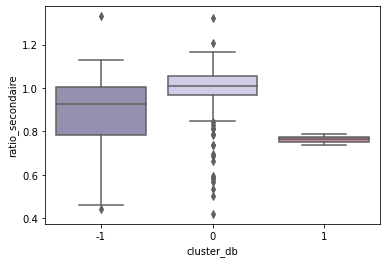

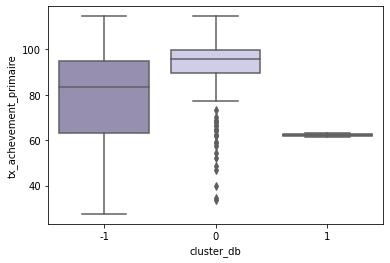

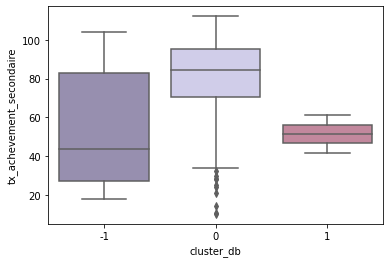

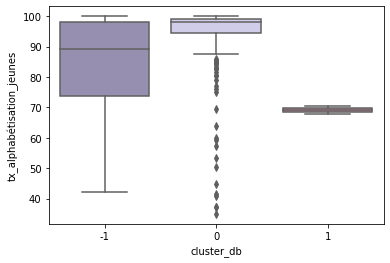

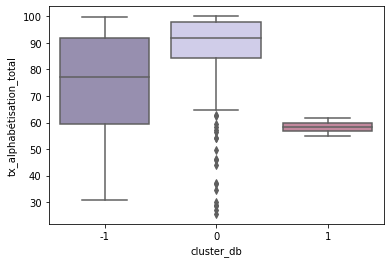

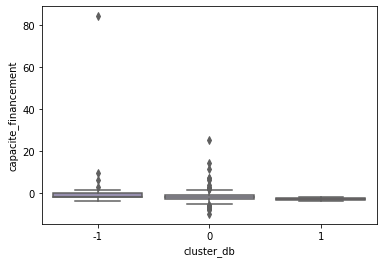

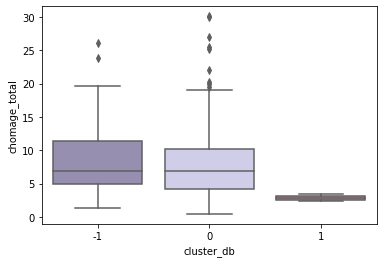

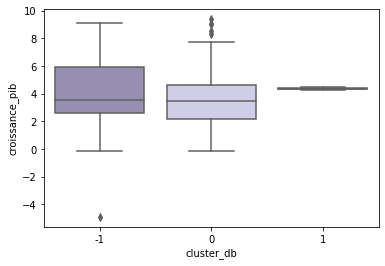

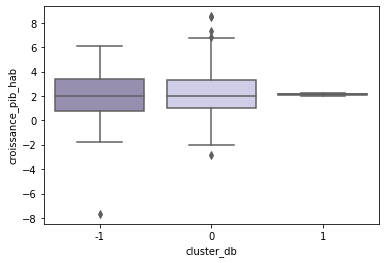

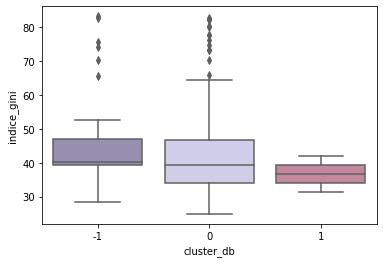

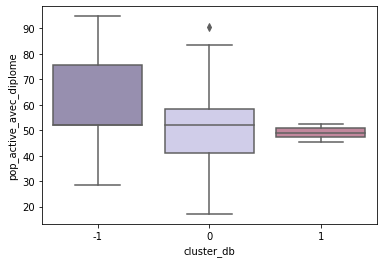

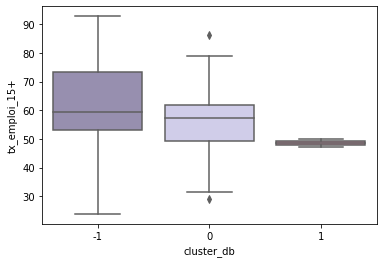

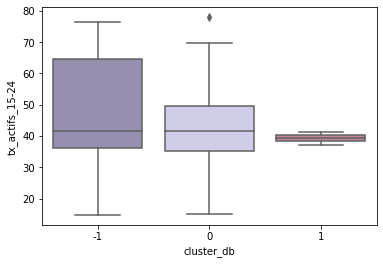

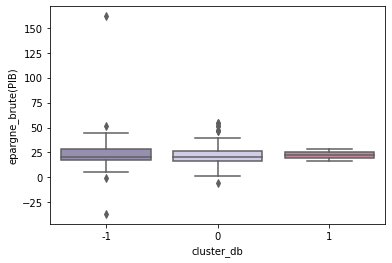

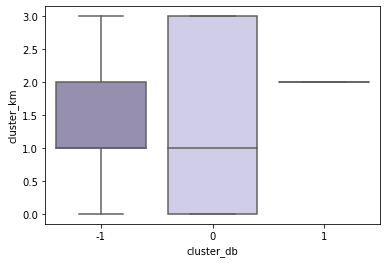

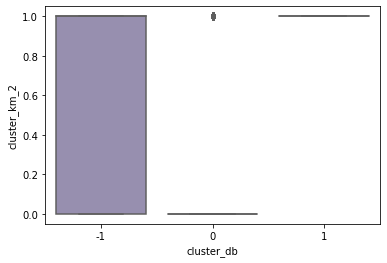

In [34]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#ccc8ee","#cc7e9b", "#aaa2a1"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_db', y = i, data = data)
    plt.show()